In [0]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
import glob
import argparse
import math

In [14]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
images = []


# Reading all the Images

In [16]:
labels=[]
gt=0
for file in glob.glob('../content/drive/My Drive/AVR_data/**/*.jpg',recursive=True):
  img = cv2.imread(file)
  images.append(img)
  labels.append(gt)
  gt+=1
for file in glob.glob('../content/drive/My Drive/AVR_data/**/*.JPG',recursive=True):
  img = cv2.imread(file)
  images.append(img)
for file in glob.glob('../content/drive/My Drive/AVR_data/**/*.jpeg',recursive=True):
  img = cv2.imread(file)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  images.append(img)
print (len(images))

858


# Loading Cascades

In [17]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml -P drive/My\ Drive
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -P drive/My\ Drive
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml -P drive/My\ Drive  
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml -P drive/My\ Drive
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt_tree.xml -P drive/My\ Drive
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml -P drive/My\ Drive
!wget https://raw.githubusercontent.com/opencv/opencv_contrib/master/modules/face/data/cascades/haarcascade_mcs_nose.xml -P drive/My\ Drive

--2019-03-31 21:57:04--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘drive/My Drive/haarcascade_eye.xml.21’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.04s   

2019-03-31 21:57:04 (8.48 MB/s) - ‘drive/My Drive/haarcascade_eye.xml.21’ saved [341406/341406]

--2019-03-31 21:57:06--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connect

In [0]:
cascades_path = 'drive/My Drive/'
face_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_eye_tree_eyeglasses.xml')
nose_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_mcs_nose.xml')

# Detecting Eyes and Face

In [0]:
def face_eyes(img,gray,face_cascade):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#     print (len(faces))
    eye = []
    face_x =0
    face_y =0
    eye_c =[]
    for (x,y,w,h) in faces:
        face_x = x
        face_y = y
#         cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        print ("No ofeyes ",len(eyes))
        count=0
        for (ex,ey,ew,eh) in eyes:
            count+=1
            if(count>2):
              break
            eye_c.append(ex)
            eye_c.append(ey)
            cv2.rectangle(img,(x+ex,y+ey),(x+ex+ew,y+ey+eh),(0,255,0),5)
            plt.imshow(roi_color)
            plt.xticks([]),plt.yticks([])
            roi_eyes = roi_color[ey:ey+eh, ex:ex+ew]
            eye.append(roi_eyes)
    return img
def face_eyes_c(img,gray):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        face_x = x
        face_y = y
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    roi_eyes = roi_color[eyes[0][1]:eyes[0][1]+eyes[0][3], eyes[0][0]:eyes[0][0]+eyes[0][2]]
    gray_img = cv2.cvtColor(roi_eyes,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray_img,90,255,0)
    M = cv2.moments(thresh)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    lx = face_x+cX+eyes[0][0]
    ly = face_y+cY+eyes[0][1]
    cv2.circle(img, (lx,ly), 6, (255, 255, 0), 4)
    
    roi_eyes = roi_color[eyes[1][1]:eyes[1][1]+eyes[1][3], eyes[1][0]:eyes[1][0]+eyes[1][2]]
    gray_img = cv2.cvtColor(roi_eyes,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray_img,90,255,0)
    M = cv2.moments(thresh)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    lx = face_x+cX+eyes[1][0]+3
    ly = face_y+cY+eyes[1][1]-6
    cv2.circle(img, (lx,ly), 6,(255, 255, 0), 4)
            
    return img
   

# Extracting Eyes

# Trying on an Image

(1024, 1024, 3)


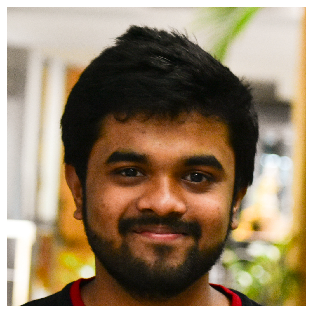

In [20]:
img1 =  images[0]
img = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.show()


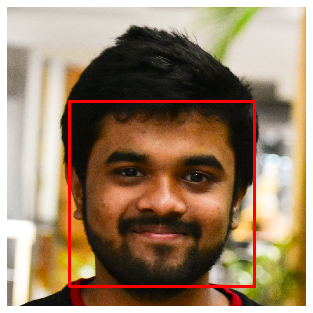

In [21]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
eye = []
face_x =0
face_y =0
for (x,y,w,h) in faces:
  face_x = x
  face_y = y
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.show()

No ofeyes  2


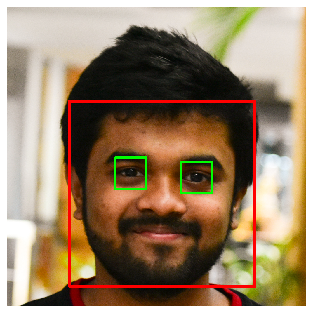

In [22]:
img2 = face_eyes(img,gray,face_cascade)
plt.imshow(img2)
plt.xticks([]),plt.yticks([])
plt.show()

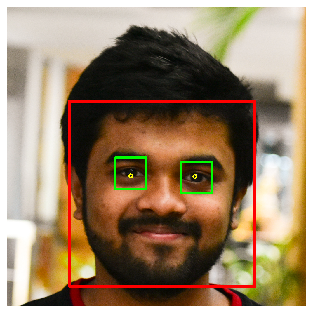

In [23]:
img3 = face_eyes_c(img,gray)
plt.imshow(img3)
plt.xticks([]),plt.yticks([])
plt.show()

# Nose Detection

1


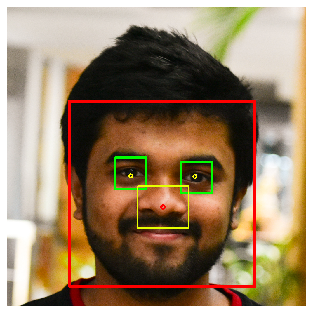

In [24]:
nose_rects = nose_cascade.detectMultiScale(img3, 1.3, 5)
print(len(nose_rects))
for (x,y,w,h) in nose_rects:
    cv2.rectangle(img3, (x,y), (x+w,y+h), (230,255,0), 3)
    cv2.circle(img3, (int((2*x+w)/2),int((2*y+h)/2)), 6, (255, 0, 0), 5)
    nose_x,nose_y=(2*x+w)/2,(2*y+h)/2
plt.imshow(img3)
plt.xticks([]),plt.yticks([])
plt.show()

# Extracting the oval region

In [0]:
def oval(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    face_x =0
    face_y =0
    for (x,y,w,h) in faces:
        face_x = x
        face_y = y
        roi_gray = gray[y:y+h, x:x+w]
        roi_color =img[y:y+h, x:x+w]
        mask = np.zeros_like(roi_color)
        rows, cols,_ = mask.shape
        mask=cv2.ellipse(mask,(int(rows/2), int(cols/2)), (250,300), angle=0, startAngle=0, endAngle=360, color=(255,255,255), thickness=-1)
        
        oval = np.bitwise_and(roi_color,mask)
        final_img=np.zeros_like(img)
        final_img[y:y+h, x:x+w]= oval
    return final_img

In [0]:
result=oval(images[186])

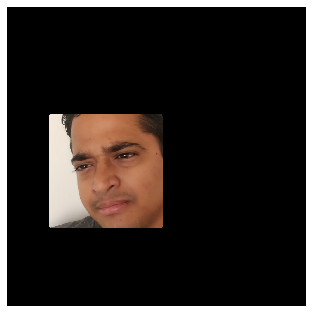

In [27]:
plt.imshow(result)
plt.xticks([]),plt.yticks([])
plt.show()